# SyriaTel  Customer Churn using Machine Learning

### Problem

SyriaTel has the significant issue of customer churn, wherein subscribers terminate their services, resulting in revenue decline, diminished market share, and heightened expenses related to gaining new customers to offset those that depart. This challenge necessitates the early prediction of at-risk clients via binary classification (churn vs. non-churn) to facilitate targeted retention efforts, optimise resource allocation, and sustain competitive stability in the telecoms industry.

## Business Context 



## Stakeholders

### Internal Stakeholders

- Executive Leadership (Chief Executive Officer (CEO), Chief Technology Officer (CTO), Chief Financial Officer (CFO)):
    Responsible for profitability, shareholder value, and strategic direction. Directly affected by revenue decline resulting from client attrition and expenses associated with customer acquisition. Seek data-driven insights to allocate capital and guide corporate strategy.

- Marketing Department: 
    Responsible for customer acquisition, retention initiatives, and brand perception. Requires churn predictions to formulate tailored offers, enhance marketing expenditure (CAC), and assess campaign ROI.

- Customer Service & Support Teams:
    The primary interface for client engagement and problem resolution. Demands early alerts to prioritise high-risk clients, address pain points proactively, and enhance satisfaction.

### External Stakeholders

- Customers (Exsisting Subscribers):
    Service quality, cost, and support all have an effect on them. Churn behaviour is based on how happy they are and how much they think the service is worth. Actions to keep them affect their experience.

- Shareholders & Investors:
    Interested in the welfare of the business and its bottom line in the abstract. A company's stock price, growth prospects, and revenue stability are all affected by its churn rate.

## Data Understanding

In [384]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

%matplotlib inline


In [385]:
Tel = pd.read_csv("Telecom's data.csv")
Tel.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [386]:
# creating a copy of the data to avoid any changes to original data
data = Tel.copy()
data.shape

(3333, 21)

In [387]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


### Observations from summary statistics

- Service Usage Indicators with a High Churn Risk

    An extremely skewed distribution is observed in customer support calls (mean=1.56, 75th percentile=2, max=9).  An important churn predictor is the existence of customers with 9 service calls, which indicates significant unhappiness.

     The usage of voicemail is extremely skewed; half of the customers never use it (median=0), while there may be separate behavioural segments of strong users (up to 51 messages).

- Pricing Sensitivity Indicated by Usage Patterns

    Despite equal minute volumes (~180 min) during the day and night, the charges during the day are 3.5 times higher (mean=30.56) than at night (mean=9.04), suggesting that there is a possibility of bill shock at peak hours.

    Low involvement (mean=4.48 calls, 10.24 min) in international services may be due to excessive costs or a lack of interest.

- Inefficiencies in Operations

    Rigid pricing plans without time-based flexibility are indicated by consistent call volume across day, eve, and night (all means ≈100 calls) with tight standard deviations (σ≈20).

    There seems to be an unusual concentration of area codes (408/415/510), which could be hiding regional service gaps.

- Fears Regarding Data Redundancy

    Day charge=30.56 and minute charge=179.78 are two examples of clearly visible minute-charge correlations.  Models may be subject to multicollinearity if both are included.

- Disparity in Essential Merits

    There are outlier clients that require segmentation because to the long-tailed distributions of international calls (20 vs. 75th percentile=6) and voicemail usage (51 vs. 75th percentile=20).





In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Obsvertions of the Data types

- Numerical Data types

    - Account Length
    - Area Code
    - Number vmail messages
    - Total day calls
    - Total eve calls
    - Total night calls
    - Total intl calls
    - Total day minutes
    - Total day charge
    - Total eve minutes
    - Total eve charge
    - Total night minutes
    - Total night charge
    - Total intl minutes
    - Total intl charge
    - Total intl charge
    - Customer service calls

- Categorical Data types

    - State
    - Phone number
    - International plan
    - Voice mail plan
    - Churn

## EDA

### Distribution analysis

### 1. Visualization of the spread of key numerical features:

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

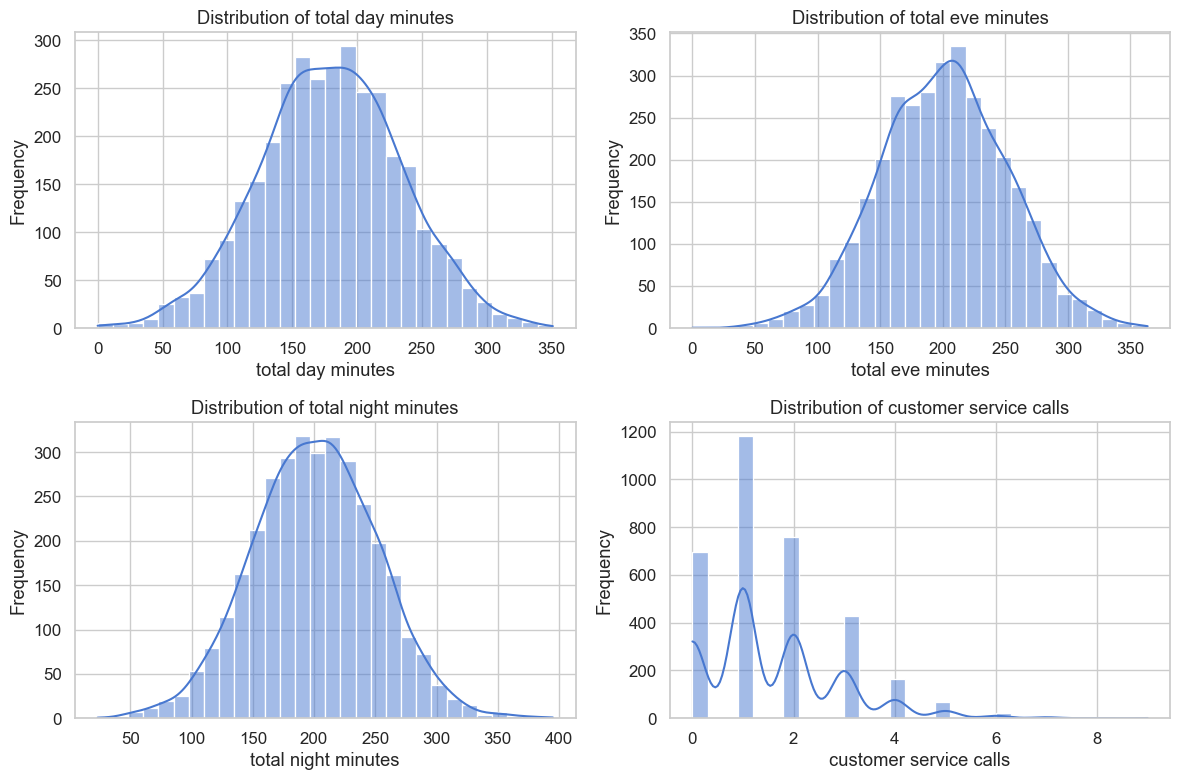

In [389]:
# Plot distribution of key numerical features to examine their spread and central tendencies
cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'customer service calls']

# Create a 2x2 grid of subplots with a shared figure size
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each column and its corresponding axis to draw a histogram with a KDE overlay
for col, ax in zip(cols, axes.flatten()):
    # Draw histogram with kernel density estimate to visualize both count and distribution shape
    sns.histplot(data[col], kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {col}')      # Add a title to each subplot
    ax.set_xlabel(col)                           # Label the x‑axis with the feature name
    ax.set_ylabel('Frequency')                   # Label the y‑axis with frequency

plt.tight_layout()  # Adjust subplot spacing to prevent overlap


### Key Takeaways from the Distributions

- **Daytime Usage**  
  Most consumers spend about three hours on the phone during the day (about 180 minutes), while a small minority spends a lot longer on the phone during the day.  This means that most users have a regular pattern of calls every day, but a few heavy users push the upper end of the spectrum.
  
- **Evening Patterns**  
  The average length of evening calls is likewise close to 200 minutes, but the range is a little greater than during the day. Some people, in other words, always call at the same time every night, while others change their call time more often, maybe because of job or social obligations.

- **Nighttime Habits**  
  Most people use nocturnal minutes, which start at about 23 minutes and last for roughly 200 minutes.  There are almost no users who call at zero minutes, which means that late-night calls are a common behaviour for this group of customers.

- **Customer Support Interactions**  
  Most clients only call customer service a few times, usually between zero and two times.  Some users, on the other hand, reach out multiple times (up to nine times), which shows that a few people are having problems or have enquiries that need more attention.


### 2. Comparing the usage patterns across regions

- Daytime

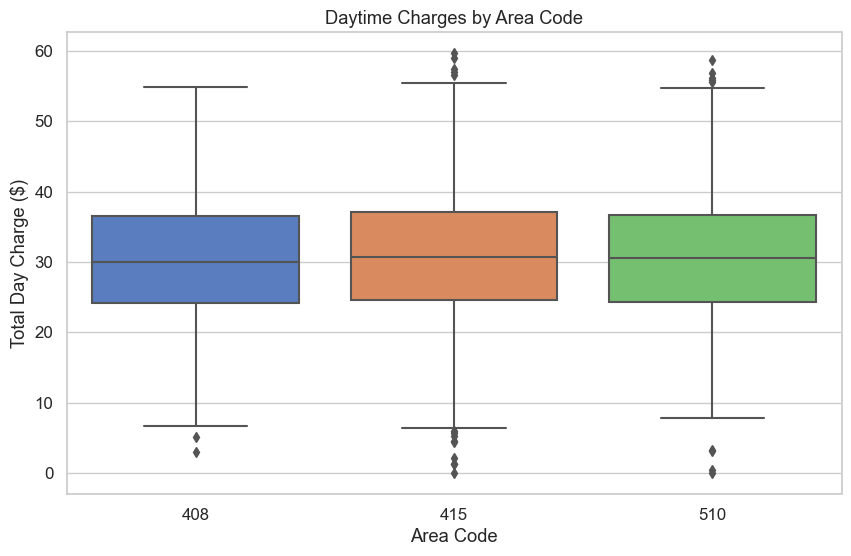

In [390]:
# A boxplot of the daytime charges per area code
plt.figure(figsize=(10, 6))                       # Create a figure with a specified size for better readability
# Plot a boxplot: x-axis shows area codes, y-axis shows total daytime charges
sns.boxplot(x='area code', y='total day charge', data=data)
plt.title('Daytime Charges by Area Code')         # Add a descriptive title to the plot
plt.xlabel('Area Code')                           # Label the x-axis
plt.ylabel('Total Day Charge ($)')                # Label the y-axis with currency units
plt.show()                                        # Display the finalized plot


### Observations from the Boxplot

- **Median Charges**  
  The thick line inside each box demonstrates that the median daytime fee is almost the same for all three area codes (408, 415, and 510). This suggests that prices or calling behaviour are generally the same across the board.

- **Spread and Variability**  
  The box for area code **510** is a little taller and the whiskers are a little longer, which means that daytime charges are more variable. Some people there call very little or very much. On the other hand, area codes **408** and **415** are a little more crowded around their medians.

- **Outliers**  
  Dots outside of the whiskers show clients who have charges that are much lower or higher than normal.  Area code 510 includes more of these extreme examples, which means that some clients may have unusual consumption patterns or customised paying plans.

- **Regional Insights**  
  All of the locations showed similar central tendencies, but the disparities in spread and outlier counts suggest that people in area code 510 may have more varied daytime calling patterns than people in the other two areas.

- Night time

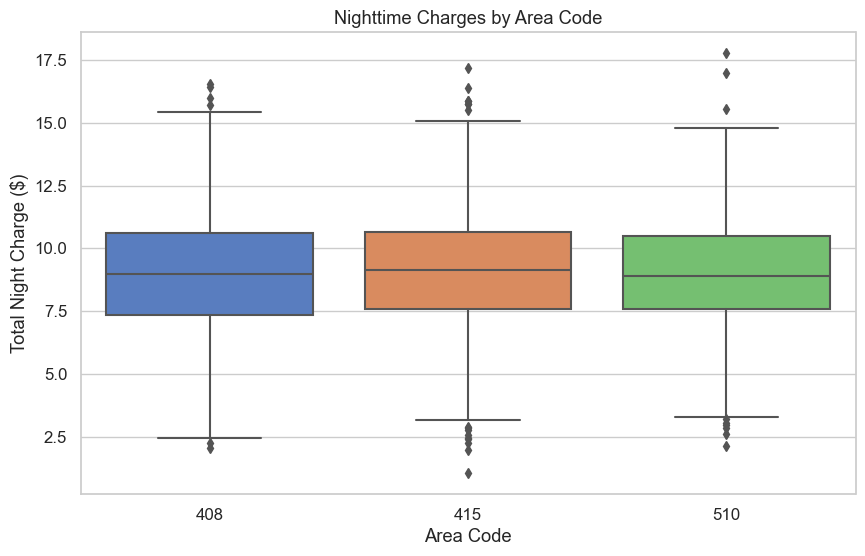

In [391]:
# A boxplot of the nighttime charges per area code
plt.figure(figsize=(10, 6))                             # Set up a figure with a clear, widescreen aspect ratio
# Draw a boxplot comparing total night charges across the three area codes
sns.boxplot(x='area code', y='total night charge', data=data)
plt.title('Nighttime Charges by Area Code')             # Give the plot a descriptive title
plt.xlabel('Area Code')                                 # Label the x-axis for clarity
plt.ylabel('Total Night Charge ($)')                    # Label the y-axis, indicating currency units
plt.show()                                              # Render and display the plot


### What the Nighttime Charges Boxplot Tells Us

- **Consistent Medians**  
    The bold line inside the box demonstrates that each area code has a similar median nighttime fee. This means that regular night rates or usual usage patterns are about the same in all regions.

- **Variability Differences**  
    The interquartile range (the box) for area code **510** is a little bit broader again, which means that people there spend different amounts on midnight calls.  Codes **408** and **415** are a little tighter, which means that most clients are closer to the middle.

- **Outliers and Extremes**  
    There are several outlier points, especially for area code 510, where some consumers seldom use midnight minutes and others use them a lot.  These extremes show that some users are very different from the average.

- **Regional Usage Insights**  
    Overall, nighttime charging patterns are mostly the same from one location to the next. However, area code 510 always stands out for having a wider range of cases and more extreme situations, which suggests that people phone each other more often after dark.


4. Exploring Interactions between key variables

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

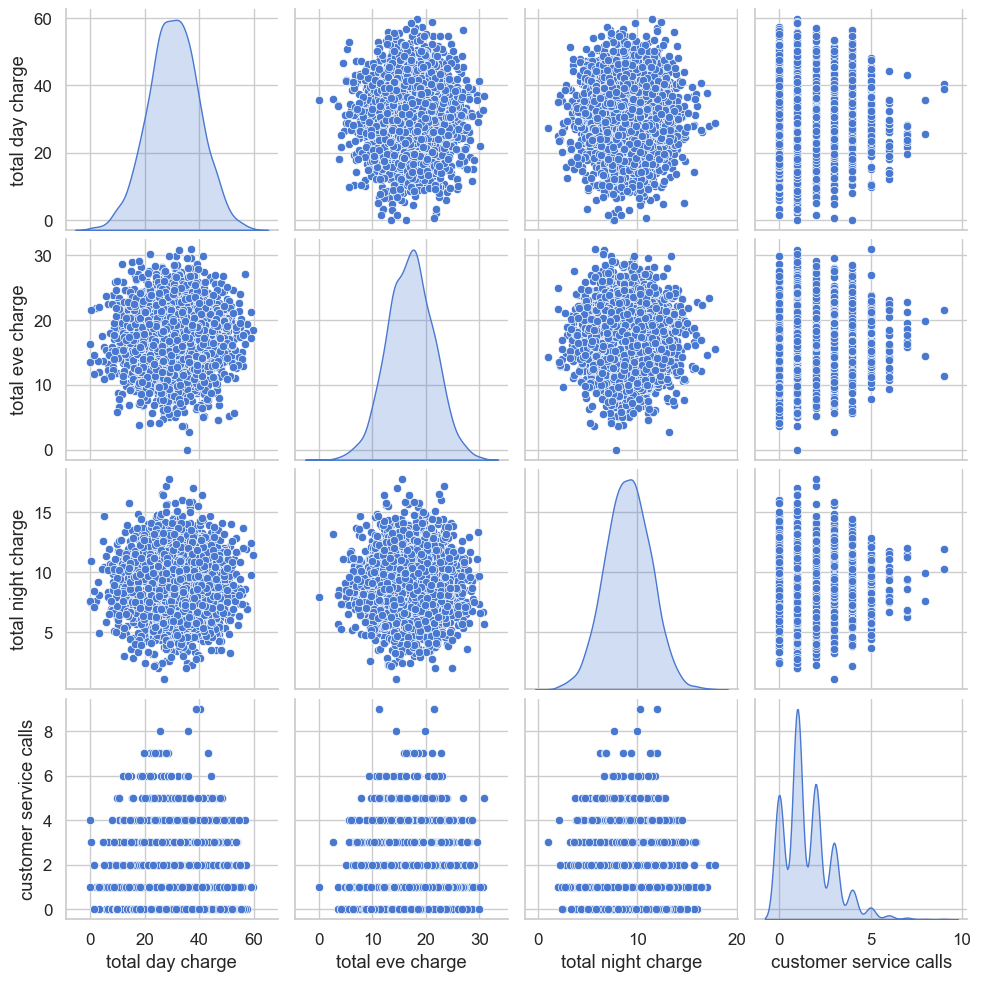

In [392]:
# Create a scatter‐plot matrix to explore pairwise relationships among key features
# We include daytime, evening, and nighttime charges, plus customer service calls
# diag_kind='kde' draws a smooth density curve along the diagonal for each variable
sns.pairplot(
    data[['total day charge', 'total eve charge', 'total night charge', 'customer service calls']],  
    diag_kind='kde'
)

### Insights from the Pairplot

- **Strong Charge Correlations**  
  The daytime, evening, and nighttime charges form a tight, roughly linear pattern in their off-diagonal scatterplots. This shows that while one period has more usage, the other periods usually do too.

- **Density Peaks**  
  The KDE curves on the diagonal demonstrate that most consumers group together around moderate prices for all three times of day: about $15–40$ for day and evening, and $5–12$ for night. This means that there is a common "average" user profile.

- **Customer Service Calls**  
  There doesn't seem to be a clear pattern between customer service calls and any of the price variables. The dots are spread out horizontally over the call count axis, which means that how often someone calls support doesn't have much to do with how much they spend on calls.

- **No Clear Subgroups**  
  We don't observe clear clusters or groups in any of the pairwise views. This suggests that these qualities change all the time instead of creating clear client categories based just on charges and support exchanges.


5. Comparing call patterns across time periods:

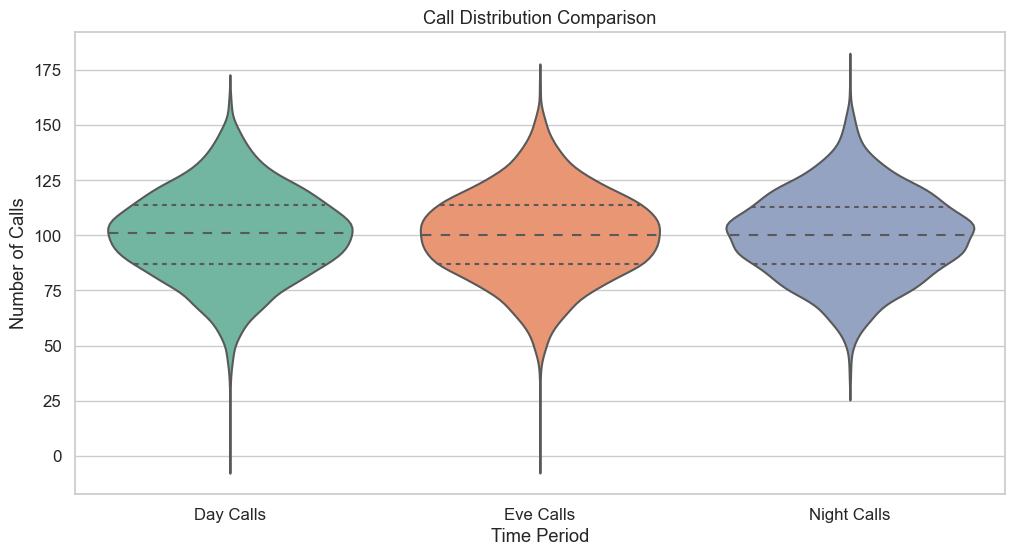

In [393]:
# Create violin plots to compare call distributions across different times of day
plt.figure(figsize=(12, 6))                                            # Define figure size for clarity
# Draw violin plots for daytime, evening, and nighttime call counts
# inner="quartile" adds lines for the 25th, 50th, and 75th percentiles
# palette="Set2" applies a visually distinct color palette for each category
sns.violinplot(
    data=data[['total day calls', 'total eve calls', 'total night calls']],
    inner="quartile",
    palette="Set2"
)
plt.title('Call Distribution Comparison')                              # Title the plot to describe its purpose
plt.xlabel('Time Period')                                              # Label the x-axis to denote categories
plt.ylabel('Number of Calls')                                          # Label the y-axis for call counts
plt.xticks([0, 1, 2], ['Day Calls', 'Eve Calls', 'Night Calls'])       # Rename x-tick labels for readability
plt.show()                                                              # Display the plot


### What the Violin Plots Reveal

- **Shape of Distributions**  
    The shapes of the violins demonstrate that the number of calls during the day, evening and night all follow the same pattern: a big centre portion where most users fall, with the ends getting smaller.  This means that there is a core group of consumers who make a normal amount of calls and fewer customers who make very few or very many calls.

- **Median and Quartiles**  
    The quartile lines inside each violin show that the median number of calls is about 100 for all time periods.  The range from the 25th to the 75th percentile is likewise similar, which suggests that people call during the same times of day.

- **Variability Insights**  
    Evening calls have a little wider range around the median, which means there is more unpredictability. Daytime and midnight calls are a little more consistent.  This could mean that evening schedules are more flexible or diversified.

- **Skewness & Extremes**  
    Each violin has a small lean towards lower call levels, with a long tail that goes up to higher counts.  A small percentage of people make a lot of calls (up to 165 during the day, 170 at night, and 175 at night), while most stay in the middle range.

Overall, these figures show that call volumes peak at about the same time in each period, while evenings have the most varied user activity.


6. Identifying extreme values in key features:

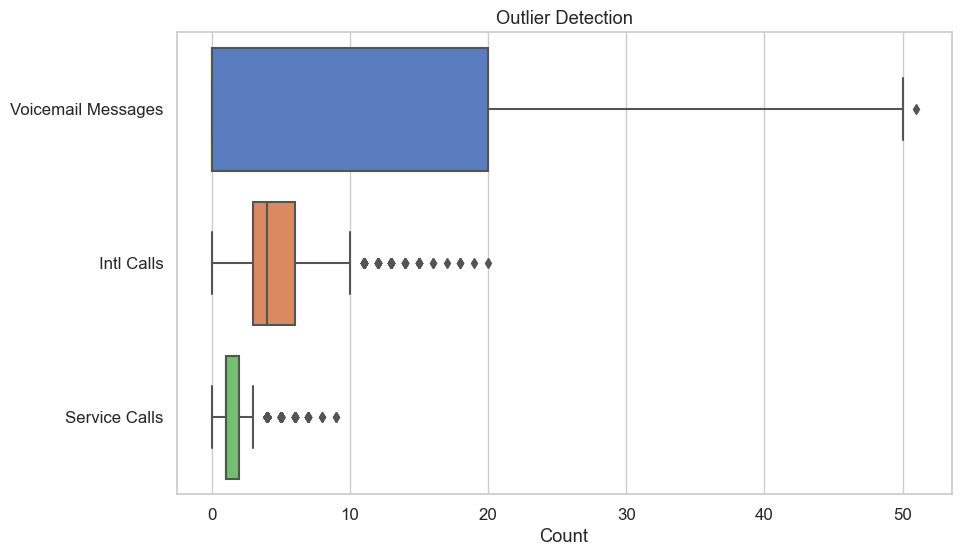

In [394]:
# Create a horizontal boxplot to identify outliers in select features
plt.figure(figsize=(10, 6))                                                      # Define figure size for clarity
# Plot boxplots for voicemail counts, international call counts, and customer service calls
sns.boxplot(
    data=data[['number vmail messages', 'total intl calls', 'customer service calls']],
    orient='h'                                                                    # Orient plots horizontally for easy reading of long labels
)
plt.title('Outlier Detection')                                                    # Add an informative title
plt.xlabel('Count')                                                               # Label the x-axis to indicate 'Count'
plt.yticks([0, 1, 2], ['Voicemail Messages', 'Intl Calls', 'Service Calls'])      # Replace y-tick labels for clarity
plt.show()                                                                        # Render the visualization


### What We Learn About Outliers

- **Voicemail Messages**  
    Most clients don't have any voicemails, as seen by a tight box with almost no messages, but a few do have dozens (up to 51).  These people that leave a lot of voicemails are clearly different from the others.

- **International Calls**  
    The middle 50% of consumers make between 3 and 6 international calls, while a few make a lot more—up to 20.  Those high-call outliers are probably people who travel a lot or call people in other countries.

- **Customer Service Calls**  
    Most customers only phone assistance once or twice, but some call as much as nine times.  These outliers could mean that some people have recurring problems or accounts that require a lot of service.

In general, this boxplot shows that most customers utilise the service in a normal way, but a small number of them make a lot of voicemail, foreign calls, or support enquiries, which is worth looking into more.


7. Caomparing usage patterns across day parts

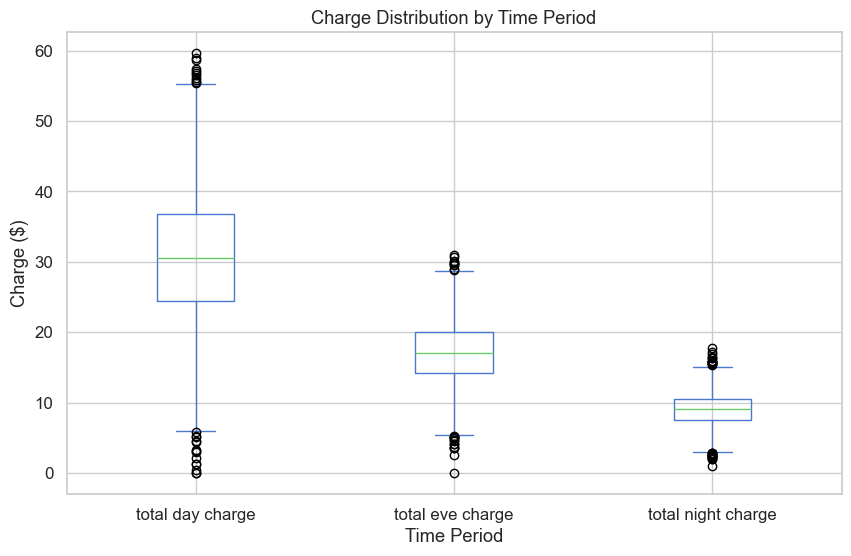

In [395]:
# Compare charge distributions across day, evening, and night using boxplots
time_cols = ['total day charge', 'total eve charge', 'total night charge']
# Plot a combined boxplot for the three charge columns
data[time_cols].plot(
    kind='box',             # Specify boxplot
    figsize=(10, 6),        # Set figure size for readability
    title='Charge Distribution by Time Period'  # Add title to the plot
)
plt.ylabel('Charge ($)')    # Label y-axis with units
plt.xlabel('Time Period')   # Label x-axis
plt.show()                  # Display the plot


### Observations on Charge Distributions

- **Central Tendency**  
  The median lines for daytime, evening, and nighttime charges are all rather near to each other. This means that the "typical" fee doesn't change a lot depending on the time of day.

- **Spread of Charges**  
  Daytime costs have the widest interquartile range, which means that customers' spending during the day is the most varied.  Evening and night prices are a little more compressed, which means that people use them more consistently outside of peak daytime hours.

- **Outliers**  
  There are clear outliers on both ends of all three times, but the day period stands out the most because some clients pay a lot more.  These extremes could be caused by those who call a lot or by special pricing plans.

- **Relative Comparison**  
  Charges at night are the lowest generally (as shown by the lower whiskers and box), charges at night are in the centre, and charges during the day are usually the greatest of the three. This trend fits with how rates usually work, with daytime rates being the highest.


8. Visualizing discrete feature distributions

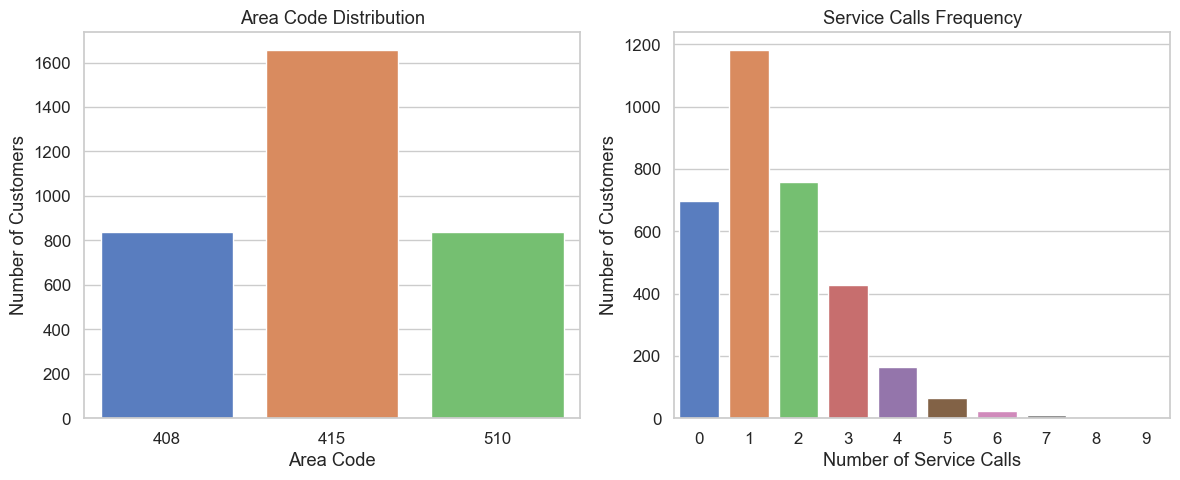

In [396]:
# Create side-by-side count plots for area codes and customer service call frequencies
fig, ax = plt.subplots(1, 2, figsize=(12, 5))        # Set up a figure with two subplots in one row

# Left plot: count of customers by area code
sns.countplot(x='area code', data=data, ax=ax[0])   # Plot how many records fall into each area code
ax[0].set_title('Area Code Distribution')           # Title the first subplot
ax[0].set_xlabel('Area Code')                       # Label the x-axis
ax[0].set_ylabel('Number of Customers')             # Label the y-axis

# Right plot: count of customers by number of service calls made
sns.countplot(x='customer service calls', data=data, ax=ax[1])  # Plot frequency of service calls per customer
ax[1].set_title('Service Calls Frequency')          # Title the second subplot
ax[1].set_xlabel('Number of Service Calls')         # Label the x-axis
ax[1].set_ylabel('Number of Customers')             # Label the y-axis

plt.tight_layout()                                   # Adjust spacing to avoid overlap
plt.show()                                           # Render both plots


### Observations from the Count Plots

- **Area Code Distribution**  
    The first graphic demonstrates that clients are rather evenly spread out among the three area codes (408, 415, and 510), with only small variances in the total numbers.  This balance means that no one region stands out in the sample.

- **Service Calls Frequency**  
    The second graphic shows that most consumers never call customer service, and the next most common thing is that they only call once.  The number of consumers goes down progressively as the number of calls goes up, and very few customers make more than four calls.  This proves that most users don't have to deal with assistance very often.


9. Churn Distribution



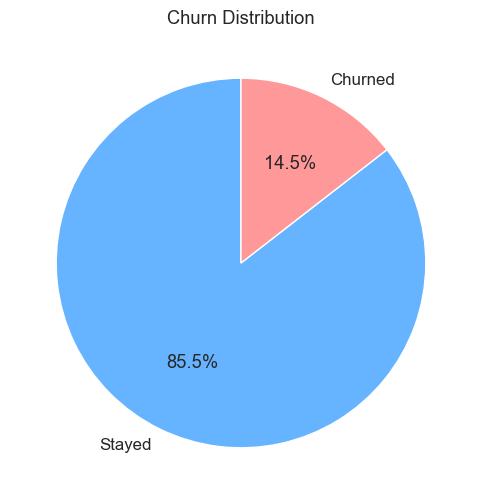

In [397]:
# Plot the distribution of customer churn as a pie chart
plt.figure(figsize=(6, 6))                                          # Create a square figure for a balanced pie
# Plot churn counts as a pie chart with percentage labels and custom colors
data['churn'].value_counts().plot.pie(
    autopct='%1.1f%%',                                              # Show percentages with one decimal place
    colors=['#66b3ff', '#ff9999'],                                  # Assign distinct colors to each segment
    labels=['Stayed', 'Churned'],                                   # Replace default labels with descriptive ones
    startangle=90                                                    # Rotate chart so first segment starts at the top
)
plt.title('Churn Distribution')                                     # Add a title to the chart
plt.ylabel('')                                                      # Remove the default y-axis label for clarity
plt.show()                                                          # Display the final plot


### What the Churn Pie Chart Tells Us

- **Customer Retention vs. Churn**  
    More than 85% of consumers stay active, while less than 15% choose to leave.

- **Business Implication**  
    Even while most customers stay, the group that leaves still makes up a significant part of the business that could affect sales.    

- **Next Steps**  
    To cut down on churn even further, it would be helpful to look at the traits of customers who leave, including how often they use the service or how many times they call for help, to find at-risk groups and come up with ways to keep them.


11.  Daytime Usage vs Churn (KDE Plot)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


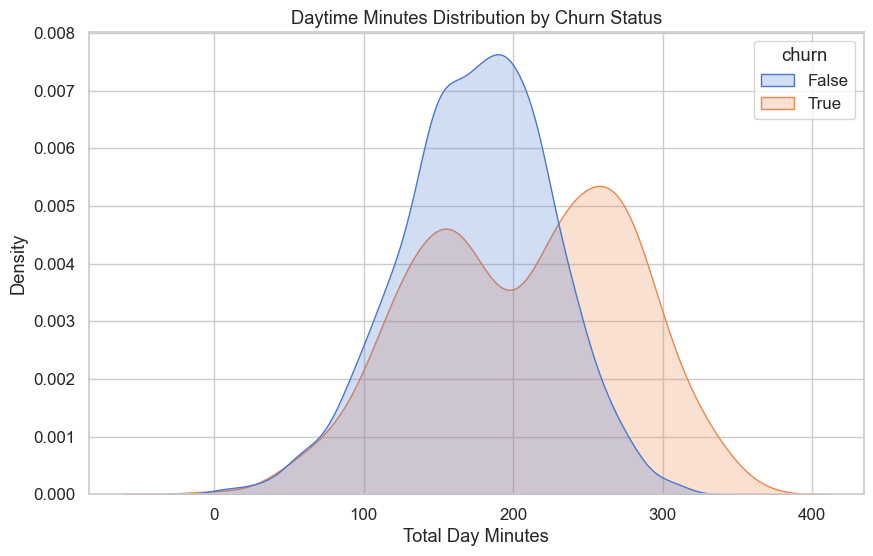

In [398]:
# Create a density plot for daytime minutes, separated by churn status
plt.figure(figsize=(10, 6))  # Set figure size for clarity
# Plot KDEs: 'hue' splits by churn (0 = Stayed, 1 = Churned); common_norm=False plots each distribution independently
# fill=True shades under each curve for visual emphasis
sns.kdeplot(
    data=data,
    x='total day minutes',
    hue='churn',
    common_norm=False,
    fill=True
)
plt.title('Daytime Minutes Distribution by Churn Status')  # Add a descriptive title
plt.xlabel('Total Day Minutes')                            # Label x-axis
plt.ylabel('Density')                                      # Label y-axis
plt.show()                                                 # Render the plot


### Observations from the KDE Plot

- **Core Usage Differences**  
  Customers that don't leave (churn=0) are densely clustered around 150–200 minutes of daytime calls, which is an obvious peak in that range.  Customers who have churned (churn=1), on the other hand, have a curve that is wider and flatter.

- **Risk at the Extremes**  
  The group that churned has a higher density at both very low (<100 minutes) and extremely high (>250 minutes) usage.  This means that clients who phone a lot or very little during the day are more likely to leave.

- **Actionable Insight**  
  Keeping an eye on clients at the ends of the usage distribution could assist find individuals who are likely to leave.  Customised retention offerings, such lower prices for heavy users and more engagement for light users, might help keep customers from leaving.


## Data Preparation:

1. Drop Columns

In [358]:
columns_to_drop = [
    'phone number', 
    'state'
]

# Create new DataFrame instead of modifying in place
data = data.drop(columns=columns_to_drop)

Feature Engineering

In [359]:
# 1. Usage efficiency features
data['day_charge_per_call'] = data['total day charge'] / (data['total day calls'] + 1e-6)
data['eve_charge_per_call'] = data['total eve charge'] / (data['total eve calls'] + 1e-6)
data['intl_charge_per_call'] = data['total intl charge'] / (data['total intl calls'] + 1e-6)

# 2. Usage concentration features
total_charge = data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)
data['day_charge_ratio'] = data['total day charge'] / total_charge
data['eve_charge_ratio'] = data['total eve charge'] / total_charge

# 3. Behavioral flags
data['high_service_calls'] = (data['customer service calls'] > 3).astype(int)
data['no_voicemail'] = (data['number vmail messages'] == 0).astype(int)

# 4. Aggregate features
data['total_charge'] = data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)
data['total_calls'] = data[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)


2. Encode

In [360]:
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encode area code (creates 3 new columns)
data = pd.get_dummies(data, columns=['area code'], prefix='area', drop_first=True)


In [361]:
# Step 4: Remove redundant features
data = data.drop([
    'total day minutes', 'total eve minutes', 'total night minutes',
    'total intl minutes', 'total intl charge'
], axis=1)


3. Splitting data

In [362]:
X = data.drop(['churn'], axis=1)
y = data['churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42, stratify= y
)

In [363]:
# Step 6: Identify columns for scaling
# Get numerical columns excluding binary flags
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
binary_cols = ['international plan', 'voice mail plan', 'high_service_calls', 'no_voicemail']
scale_cols = [col for col in num_cols if col not in binary_cols]

4. Balancing the data

In [364]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## Logistic regression

In [365]:
# Step 8: Feature Scaling
scaler = StandardScaler()

# Scale resampled training data
X_train_res_scaled = X_train_res.copy()
X_train_res_scaled[scale_cols] = scaler.fit_transform(X_train_res[scale_cols])

# Scale test data
X_test_scaled = X_test.copy()
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

In [366]:
# Step 9: Prepare datasets for models
# For Logistic Regression (scaled data)
lr_train = X_train_res_scaled
lr_test = X_test_scaled

### Modelling

In [367]:
model_lr = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
model_lr.fit(lr_train, y_train_res)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [368]:
# Verify feature counts
print(f"Original features: {data.shape[1] - 1}")  # Exclude target
print(f"Training features (LR): {lr_train.shape[1]}")

# Verify sample sizes
print(f"\nLR training size: {lr_train.shape[0]} samples")
print(f"Target size: {y_train_res.shape[0]} samples")

# Check for NaNs
print("\nMissing values in LR train:", lr_train.isna().sum().sum())


Original features: 23
Training features (LR): 23

LR training size: 3990 samples
Target size: 3990 samples

Missing values in LR train: 0


### Interpretation

In [369]:
# Get coefficients and create dataframe
coeffs = pd.DataFrame({
    'Feature': lr_train.columns,
    'Coefficient': model_lr.coef_[0],
    'Odds_Ratio': np.exp(model_lr.coef_[0])
}).sort_values('Odds_Ratio', ascending=False)

# Display top drivers
print(coeffs.head(10))

                   Feature  Coefficient    Odds_Ratio
20             total_calls    23.042132  1.016415e+10
5         total day charge     1.797127  6.032293e+00
21                area_415     1.662996  5.275089e+00
22                area_510     1.468322  4.341941e+00
17      high_service_calls     1.286823  3.621264e+00
1       international plan     1.076766  2.935172e+00
19            total_charge     0.816896  2.263462e+00
3    number vmail messages     0.541458  1.718510e+00
11  customer service calls     0.348607  1.417093e+00
12     day_charge_per_call     0.238002  1.268711e+00


In [370]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
lr_pred = model_lr.predict(lr_test)

# Accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)

# Classification Report
lr_report = classification_report(y_test, lr_pred, target_names=['Not Churn', 'Churn'])

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)

## Decision Trees

In [371]:
dt_train = X_train_res
dt_test = X_test

In [372]:
# Decision Tree Model
model_dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)
model_dt.fit(dt_train, y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=50, random_state=42)

In [373]:
# Verify feature counts
print(f"Original features: {data.shape[1] - 1}")  # Exclude target
print(f"Training features (DT): {dt_train.shape[1]}")

# Verify sample sizes
print(f"DT training size: {dt_train.shape[0]} samples")
print(f"Target size: {y_train_res.shape[0]} samples")

# Check for NaNs
print("Missing values in DT train:", dt_train.isna().sum().sum())

Original features: 23
Training features (DT): 23
DT training size: 3990 samples
Target size: 3990 samples
Missing values in DT train: 0


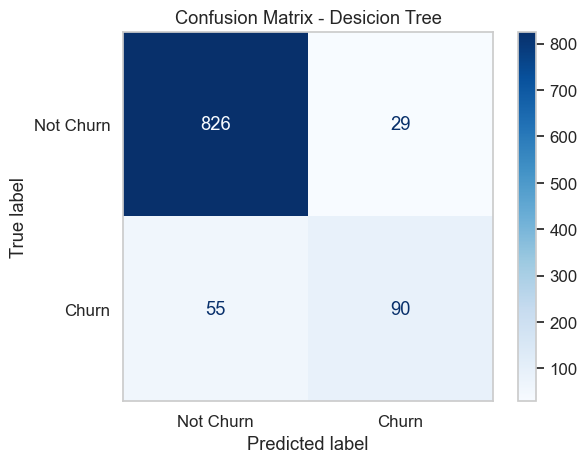

<Figure size 640x480 with 0 Axes>

Accuracy: 0.92
Precision: 0.76
Recall: 0.62
F1-Score: 0.68


In [383]:
# Make predictions on test set
y_pred = model_dt.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create visually appealing confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Not Churn', 'Churn'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Desicion Tree')
plt.grid(False)
plt.show()

# Add annotations with counts and percentages
total_samples = cm.sum()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percentage = f'{count/total_samples:.1%}'
        ax.text(j, i, f'{count}\n({percentage})', 
                ha='center', va='center',
                color='white' if count > cm.max()/2 else 'black')

plt.tight_layout()
plt.show()

# Print key metrics
tn, fp, fn, tp = cm.ravel()
print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn):.2f}")
print(f"Precision: {tp/(tp + fp):.2f}")
print(f"Recall: {tp/(tp + fn):.2f}")
print(f"F1-Score: {2*tp/(2*tp + fp + fn):.2f}")

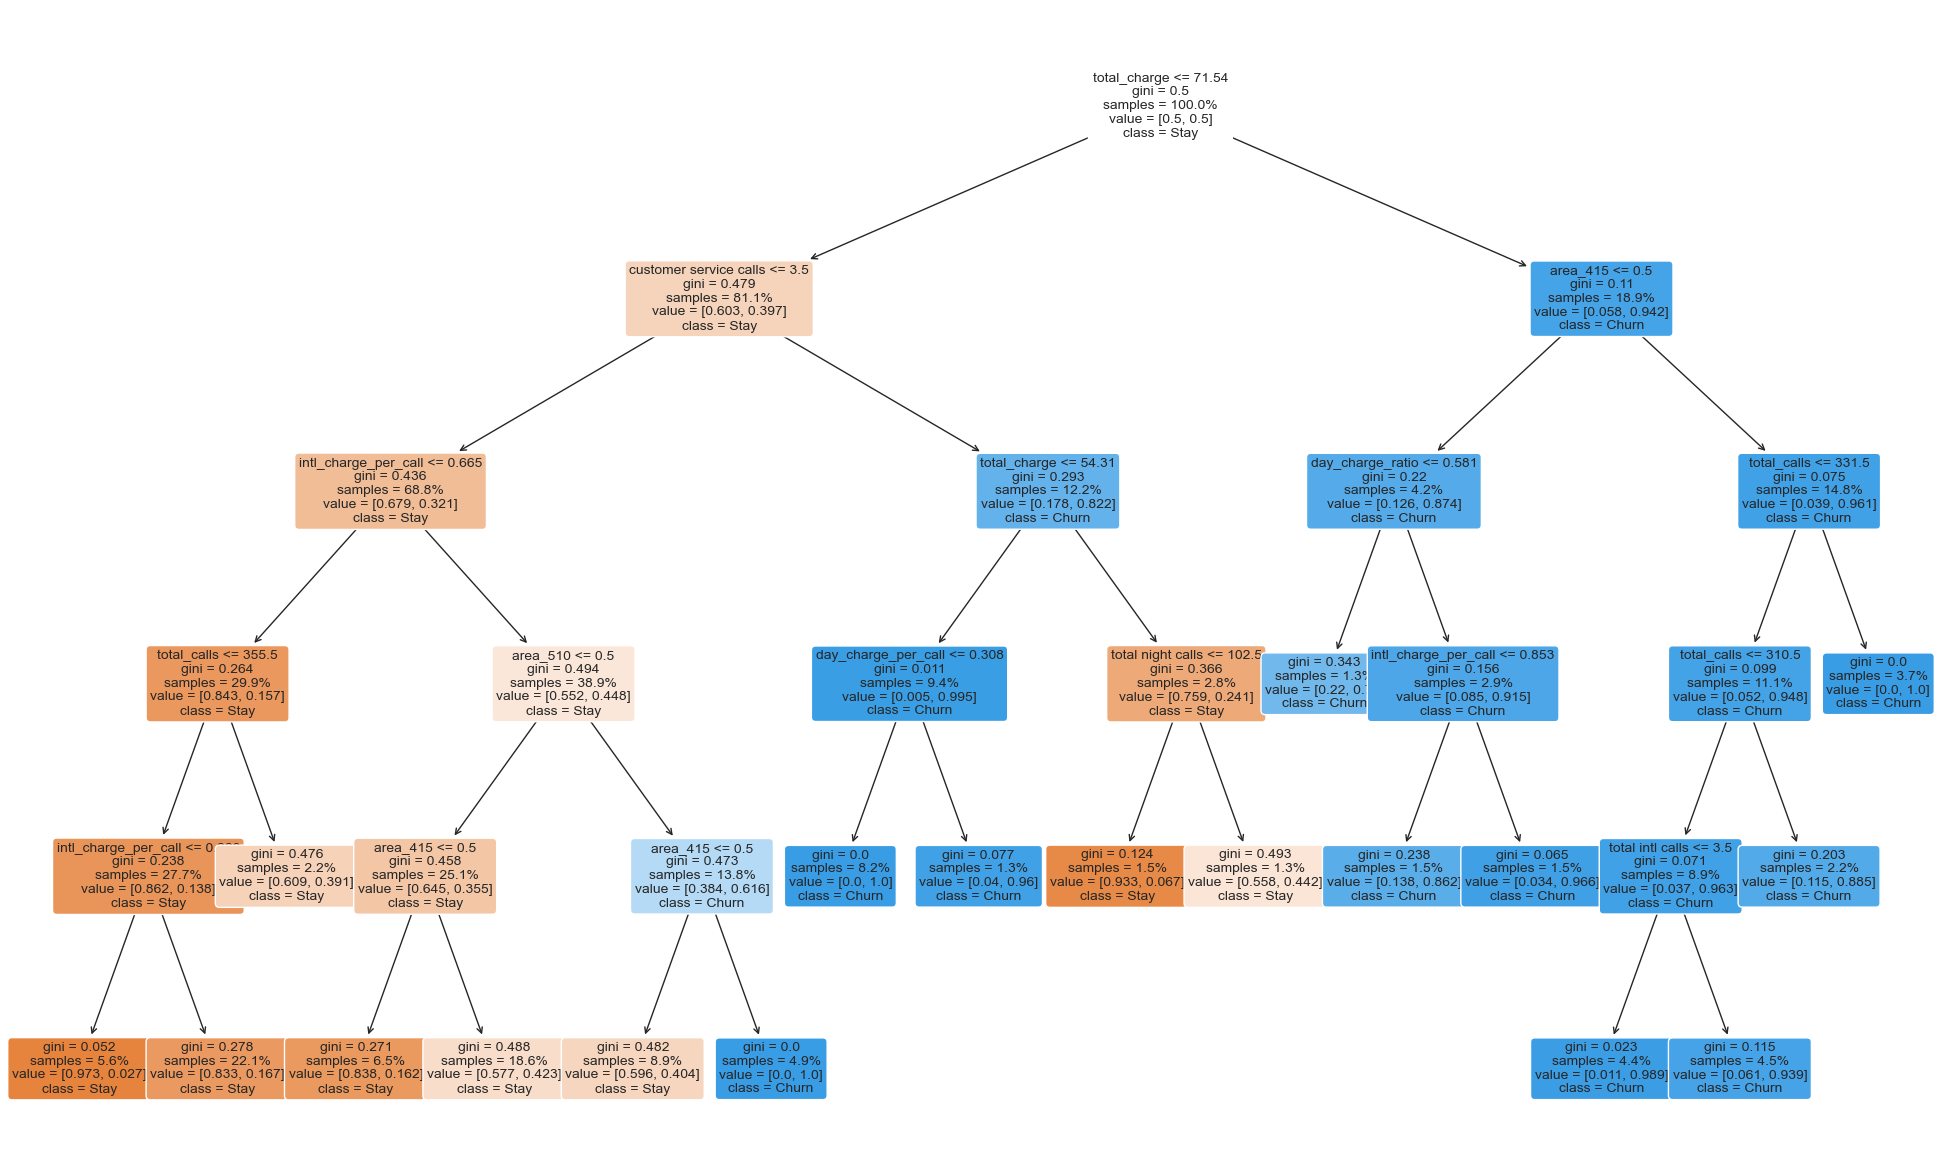

In [381]:
# Visualize decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))
plot_tree(model_dt, 
          feature_names=dt_train.columns,
          class_names=['Stay', 'Churn'],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.show()

# Get feature importance
imp = pd.DataFrame({
    'Feature': dt_train.columns,
    'Importance': model_dt.feature_importances_
}).sort_values('Importance', ascending=False)

In [375]:
# Predictions
dt_pred = model_dt.predict(dt_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)

# Classification Report
dt_report = classification_report(y_test, dt_pred, target_names=['Not Churn', 'Churn'])

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)

## Evaluation

In [376]:
# Predictions
dt_pred = model_dt.predict(dt_test)

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)

# Classification Report
dt_report = classification_report(y_test, dt_pred, target_names=['Not Churn', 'Churn'])

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)

In [377]:
print(f"""
{' Model Performance Comparison ':-^50}
Decision Tree Accuracy:       {dt_accuracy:.4f}


{' Decision Tree Classification Report ':-^50}
{dt_report}

{' Confusion Matrices ':-^50}


Decision Tree:
{dt_cm}
""")


---------- Model Performance Comparison ----------
Decision Tree Accuracy:       0.9160


------ Decision Tree Classification Report -------
              precision    recall  f1-score   support

   Not Churn       0.94      0.97      0.95       855
       Churn       0.76      0.62      0.68       145

    accuracy                           0.92      1000
   macro avg       0.85      0.79      0.82      1000
weighted avg       0.91      0.92      0.91      1000


--------------- Confusion Matrices ---------------


Decision Tree:
[[826  29]
 [ 55  90]]



Tuned Decision tree model

In [378]:
# 1. Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': [10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2', None, 0.8],
    'criterion': ['gini', 'entropy']
}

# 2. Create F1 scorer
f1_scorer = make_scorer(f1_score, average='binary', pos_label=1)

# 3. Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 4. Fit on resampled training data
grid_search.fit(dt_train, y_train_res)

# 5. Get best estimator
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [379]:
# Evaluate on test data
test_pred = best_dt.predict(dt_test)
test_f1 = f1_score(y_test, test_pred)
print("\nTuned Model Test F1-Score:", np.round(100*test_f1, 2))

# Evaluate on training data
train_pred = best_dt.predict(dt_train)
train_f1 = f1_score(y_train_res, train_pred)
print("Tuned Model Train F1-Score:", np.round(100*train_f1, 2))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))


Tuned Model Test F1-Score: 55.24
Tuned Model Train F1-Score: 92.33

Confusion Matrix:
[[717 138]
 [ 37 108]]


## Evaluation

In [380]:
print(f"""
{' Model Performance Comparison ':-^50}
Logistic Regression Accuracy: {lr_accuracy:.4f}
Decision Tree Accuracy:       {dt_accuracy:.4f}

{' Logistic Regression Classification Report ':-^50}
{lr_report}

{' Decision Tree Classification Report ':-^50}
{dt_report}

{' Confusion Matrices ':-^50}
Logistic Regression:
{lr_cm}

Decision Tree:
{dt_cm}
""")


---------- Model Performance Comparison ----------
Logistic Regression Accuracy: 0.8100
Decision Tree Accuracy:       0.9160

--- Logistic Regression Classification Report ----
              precision    recall  f1-score   support

   Not Churn       0.92      0.85      0.88       855
       Churn       0.39      0.57      0.47       145

    accuracy                           0.81      1000
   macro avg       0.66      0.71      0.68      1000
weighted avg       0.84      0.81      0.82      1000


------ Decision Tree Classification Report -------
              precision    recall  f1-score   support

   Not Churn       0.94      0.97      0.95       855
       Churn       0.76      0.62      0.68       145

    accuracy                           0.92      1000
   macro avg       0.85      0.79      0.82      1000
weighted avg       0.91      0.92      0.91      1000


--------------- Confusion Matrices ---------------
Logistic Regression:
[[727 128]
 [ 62  83]]

Decision Tree:
[[82